<a href="https://colab.research.google.com/github/nicolez9911/colab/blob/main/03_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.cifar10


(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(50000, 32, 32, 3)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 32, 32, 3)
test_images=test_images/255.0

170498071/170498071 [==============================] - 2s 0us/step


In [2]:
import matplotlib.pyplot as plt

def generate_plot(history):
  # Plot training history (loss and accuracy)
  plt.figure(figsize=(12, 5))

  # Plot training & validation loss
  plt.subplot(1, 2, 1)
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.title('Training and Validation Loss')

  # Plot training & validation accuracy
  plt.subplot(1, 2, 2)
  plt.plot(history.history['accuracy'], label='Training Accuracy')
  plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.title('Training and Validation Accuracy')

  plt.tight_layout()
  return plt

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_62 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_34 (MaxPooli  (None, 15, 15, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_63 (Conv2D)          (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_35 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_17 (Flatten)        (None, 2304)              0         
                                                                 
 dense_33 (Dense)            (None, 10)              

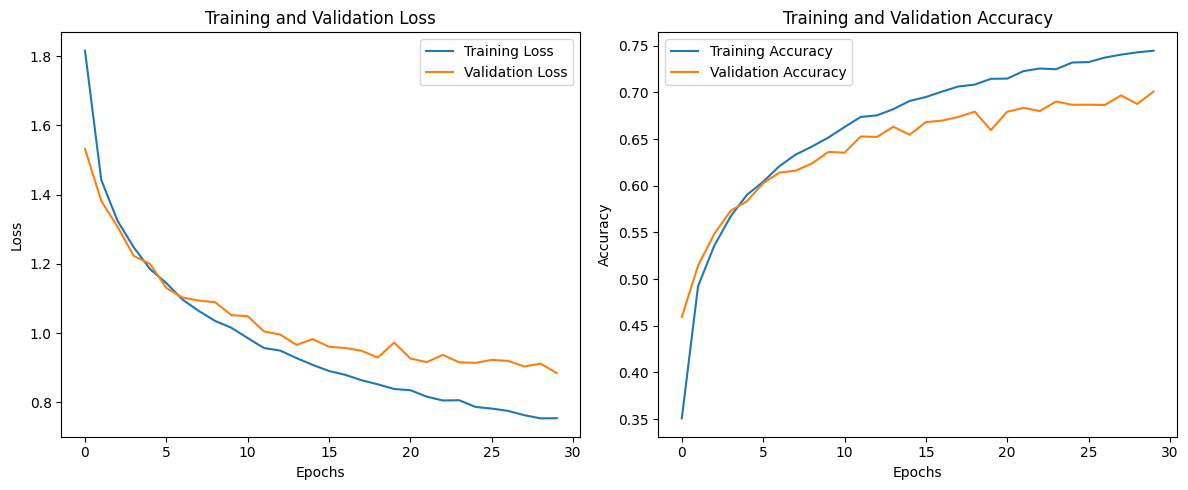

In [21]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(32, 32, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(training_images,
                    training_labels,
                    #validation_split=0.4,
                    validation_data=(test_images, test_labels),
                    epochs=30,
                    batch_size=512)

plt = generate_plot(history)
plt.show()

#test_loss = model.evaluate(test_images, test_labels)
#test_loss

## take small subset to get overfitting problem


Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_72 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_44 (MaxPooli  (None, 15, 15, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_73 (Conv2D)          (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_45 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_22 (Flatten)        (None, 2304)              0         
                                                                 
 dense_38 (Dense)            (None, 10)              

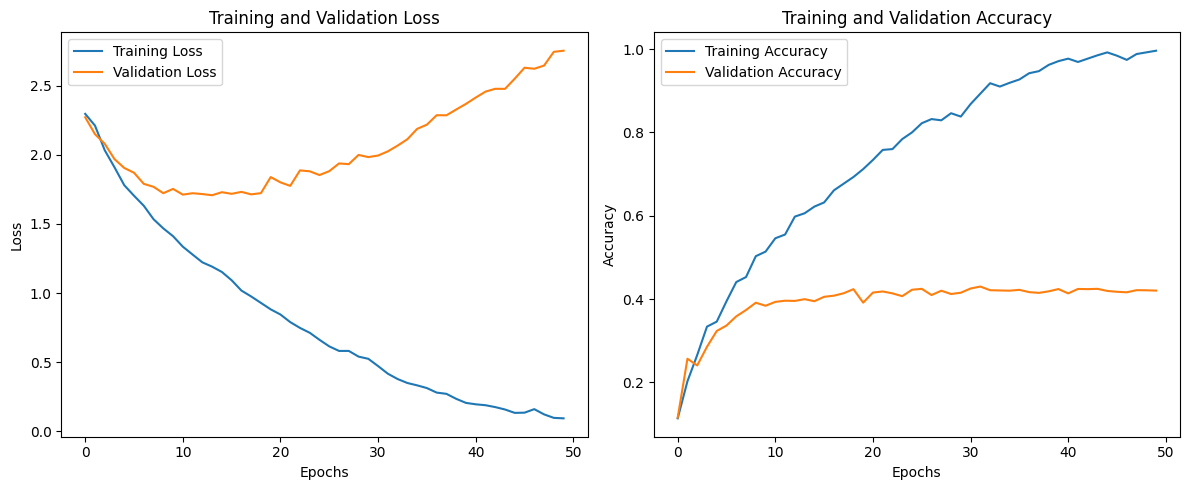

In [26]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(32, 32, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(training_images[:1000],
                    training_labels[:1000],
                    #validation_split=0.4,
                    validation_data=(test_images, test_labels),
                    epochs=50,
                    batch_size=64)

plt = generate_plot(history)
plt.show()

## adding weight regularisation

In [9]:
from tensorflow.keras import regularizers


Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_74 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_46 (MaxPooli  (None, 15, 15, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_75 (Conv2D)          (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_47 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_23 (Flatten)        (None, 2304)              0         
                                                                 
 dense_39 (Dense)            (None, 10)              

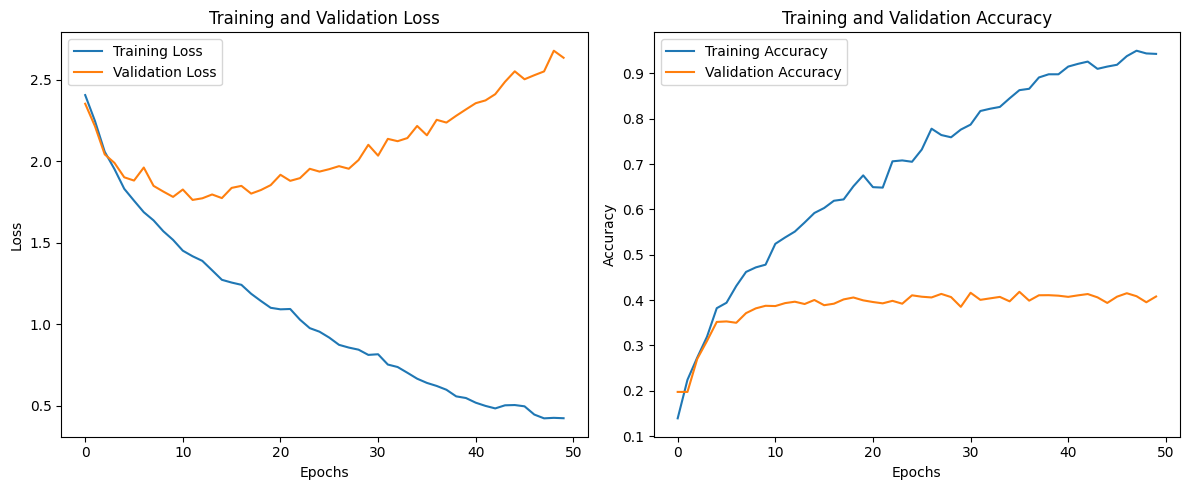

In [27]:
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3),
                         kernel_regularizer=regularizers.l2(0.002),
                         activation='relu',
                         input_shape=(32, 32, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3),
                         kernel_regularizer=regularizers.l2(0.002),
                         activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10, activation='softmax')
])
model_1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_1.summary()

history = model_1.fit(training_images[:1000],
                    training_labels[:1000],
                    #validation_split=0.4,
                    validation_data=(test_images, test_labels),
                    epochs=50,
                    batch_size=64)

plt = generate_plot(history)
plt.show()

## adding dropout

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_76 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 dropout_20 (Dropout)        (None, 30, 30, 64)        0         
                                                                 
 max_pooling2d_48 (MaxPooli  (None, 15, 15, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_77 (Conv2D)          (None, 13, 13, 64)        36928     
                                                                 
 dropout_21 (Dropout)        (None, 13, 13, 64)        0         
                                                                 
 max_pooling2d_49 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                               

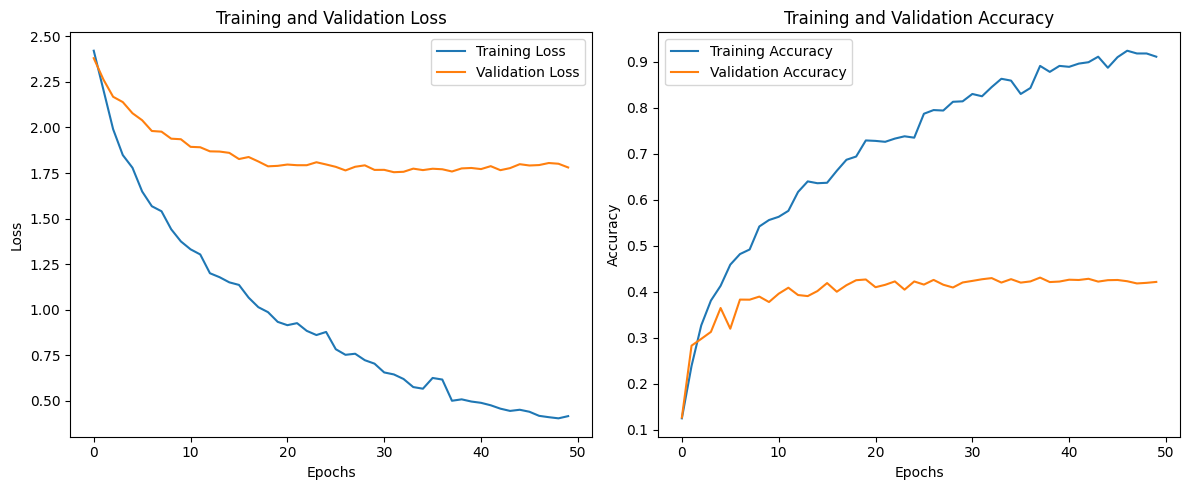

In [28]:
model_2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3),
                         kernel_regularizer=regularizers.l2(0.002),
                         activation='relu',
                         input_shape=(32, 32, 3)),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3),
                         kernel_regularizer=regularizers.l2(0.002),
                         activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10, activation='softmax')
])
model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_2.summary()

history = model_2.fit(training_images[:1000],
                    training_labels[:1000],
                    #validation_split=0.4,
                    validation_data=(test_images, test_labels),
                    epochs=50,
                    batch_size=64)

plt = generate_plot(history)
plt.show()

## early stopping

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_80 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 dropout_24 (Dropout)        (None, 30, 30, 64)        0         
                                                                 
 max_pooling2d_52 (MaxPooli  (None, 15, 15, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_81 (Conv2D)          (None, 13, 13, 64)        36928     
                                                                 
 dropout_25 (Dropout)        (None, 13, 13, 64)        0         
                                                                 
 max_pooling2d_53 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                               

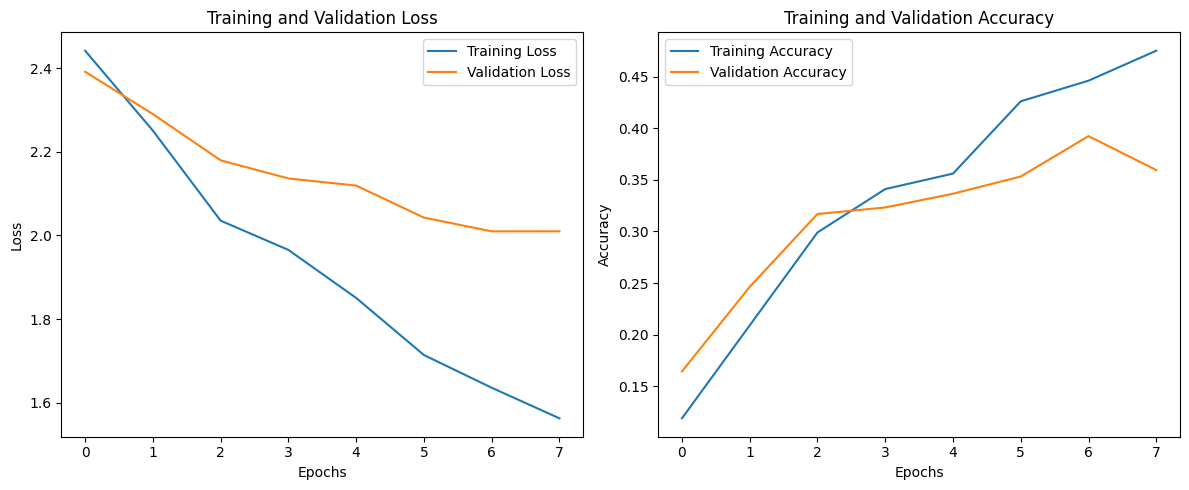

In [30]:
# add early stopping
callback = tf.keras.callbacks.EarlyStopping()

model_3 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3),
                         kernel_regularizer=regularizers.l2(0.002),
                         activation='relu',
                         input_shape=(32, 32, 3)),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3),
                         kernel_regularizer=regularizers.l2(0.002),
                         activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10, activation='softmax')
])
model_3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_3.summary()

history = model_3.fit(training_images[:1000],
                    training_labels[:1000],
                    #validation_split=0.4,
                    validation_data=(test_images, test_labels),
                    epochs=50,
                    batch_size=64,
                    callbacks=[callback])

plt = generate_plot(history)
plt.show()

# data augmentation

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_82 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 dropout_26 (Dropout)        (None, 30, 30, 64)        0         
                                                                 
 max_pooling2d_54 (MaxPooli  (None, 15, 15, 64)        0         
 ng2D)                                                           
                                                                 
 random_flip_1 (RandomFlip)  (None, 15, 15, 64)        0         
                                                                 
 random_rotation_1 (RandomR  (None, 15, 15, 64)        0         
 otation)                                                        
                                                                 
 random_zoom_1 (RandomZoom)  (None, 15, 15, 64)      

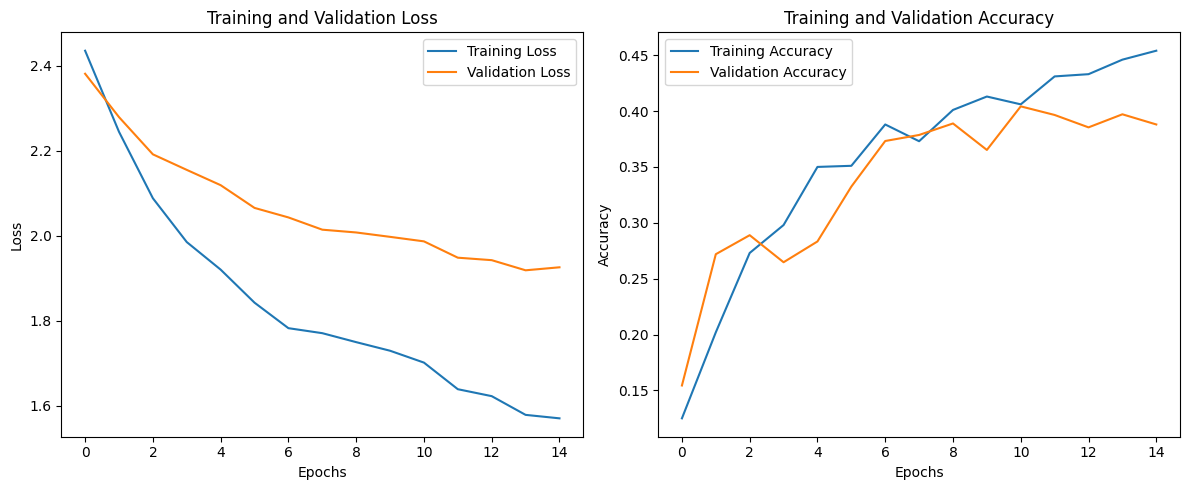

In [31]:
# add early stopping
callback = tf.keras.callbacks.EarlyStopping()

model_4 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3),
                         kernel_regularizer=regularizers.l2(0.002),
                         activation='relu',
                         input_shape=(32, 32, 3)),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.RandomFlip("horizontal"),
  tf.keras.layers.RandomRotation(0.1),
  tf.keras.layers.RandomZoom(0.2),
  tf.keras.layers.Conv2D(64, (3,3),
                         kernel_regularizer=regularizers.l2(0.002),
                         activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10, activation='softmax')
])
model_4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_4.summary()

history = model_4.fit(training_images[:1000],
                    training_labels[:1000],
                    #validation_split=0.4,
                    validation_data=(test_images, test_labels),
                    epochs=50,
                    batch_size=64,
                    callbacks=[callback])

plt = generate_plot(history)
plt.show()